In [3]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import os

In [ ]:
# Dataset-5 (Sleep)
# - Cell of 33 subjects x 4 states
# - Column 1: N1 sleep
# - Column 2: N2 sleep
# - Column 3: N3 sleep
# - Column 4: Awake state
# - Each cell entry consists of # TRs x 450 ROIs
dataset5 = loadmat('/data/dzy/combined_method/Raw_Data/Dataset-5/GSR.mat')
print(dataset5)
G_LF_cell = dataset5['G_LF']

In [ ]:
a=0
for i in range(G_LF_cell.shape[1]):  
    for j in range(G_LF_cell.shape[0]):  
        cell_data = G_LF_cell[j, i]
        if not isinstance(cell_data, np.ndarray):
            cell_data = np.array(cell_data)
        if cell_data.size == 0:
            print(f"Data for cell ({j}, {i})无数据")
        else:
            df_cell = pd.DataFrame(cell_data.T)
            a += 1
            file_path = f'/data/dzy/combined_method/Raw_Data/Dataset-5/time_series/sub-{a:02d}'
            if not os.path.exists(file_path):
                os.makedirs(file_path)

            csv_file_path = f'/data/dzy/combined_method/Raw_Data/Dataset-5/time_series/sub-{a:02d}/sub-{a:02d}.csv'
            df_cell.to_csv(csv_file_path, index=False)

            print(f"Data for cell ({j}, {i}) saved to {csv_file_path}")

In [ ]:
## Energy landscape analysis data preparation
source_folder = '/data/dzy/combined_method/Raw_Data/ds003171-download/derivatives/leida_input/time_series_roi/'
icn_file = '/data/dzy/combined_method/Raw_Data/ds003171-download/derivatives/leida_input/schaefer400x7_MNI(修改版).csv'
icn_data = pd.read_csv(icn_file)
folder_path = '/data/dzy/combined_method/Raw_Data/ds003171-download/derivatives/leida_input/timeseries_dat'
folder_path1 = '/data/dzy/combined_method/Raw_Data/ds003171-download/derivatives/leida_input/time_series'
for i in range(1,69):
    folder_name = f'sub-{i:02d}'
    file_name = f'{folder_name}.csv'    
    new_file_name = f'{folder_name}.dat'
    source_file_path = os.path.join(source_folder, folder_name, file_name)
    destination_file_path = os.path.join(folder_path, new_file_name)
    destination_file_path1 = os.path.join(folder_path1, folder_name)
    if not os.path.exists(destination_file_path1):
            os.makedirs(destination_file_path1)
    destination_file_path_csv = os.path.join(folder_path1, folder_name, file_name)
    bold_data = pd.read_csv(source_file_path)

    if 'Name' in icn_data.columns:
        bold_data.index = icn_data['Name']
    bold_data = bold_data.T
    new_data = pd.DataFrame()
    for icn in icn_data['ICN'].unique():
        icn_col = icn_data[icn_data['ICN']==icn]['Name'].tolist()
        icn_group = bold_data[icn_col]
        new_data[icn] = icn_group.mean(axis=1)
    new_data = new_data.T
    row_means = new_data.mean(axis=1)
    sign_data = pd.DataFrame(index=new_data.index, columns=new_data.columns)
    for col in new_data.columns:
        for idx in new_data.index:
            value = new_data.at[idx, col]
            if value > row_means[idx]:
                sign_data.at[idx, col] = 1
            elif value < row_means[idx]:
                sign_data.at[idx, col] = -1
    new_data.to_csv(destination_file_path_csv, index=False)
    sign_data.to_csv(destination_file_path, index=False, header=False, sep=' ')
    print(f'{source_file_path} to {destination_file_path}')

In [ ]:
##EPLSA data preparation
eigenvector_data = pd.read_csv('/data/dzy/combined_method/Raw_Data/ds003171-download/LEiDA_results_net/eigenvectors.csv',sep='\t')
sub_id = eigenvector_data['subject_id']
unique_sub_IDs = np.unique(sub_id)
print(len(unique_sub_IDs))
# icn_file = '/data/dzy/combined_method/Raw_Data/roi_label_cog/schaefer400x7_MNI(修改版).csv'
# icn_data = pd.read_csv(icn_file)
for sub_ID in unique_sub_IDs:
    sub_data_subset = eigenvector_data[eigenvector_data['subject_id'] == sub_ID]
    df = pd.DataFrame(sub_data_subset)
    df = df.iloc[:, 2:]
    df = df.T
#     print(df)
    sign_data = pd.DataFrame(index=df.index, columns=df.columns)
    for col in df.columns:
        for idx in df.index:
            value = df.at[idx, col]
            if value > 0:
                sign_data.at[idx, col] = 1
            elif value < 0:
                sign_data.at[idx, col] = -1
    sign_data.to_csv(f'/data/dzy/combined_method/Raw_Data/ds003171-download/derivatives/leida_input/eigenvector_dat/{sub_ID}.dat', index=False, header=False, sep=' ')

68
数据已保存为.dat格式


In [ ]:
roiname = ['Vis','SomMot', 'DorsAttn', 'SalVentAttn', 'Limbic', 'Cont', 'Default',  'Subcortex']
file_path = '/data/dzy/combined_method/Raw_Data/roi_label_cog/roiname.dat'

with open(file_path, 'w') as file:
    for item in roiname:
        file.write(item + '\n') 
print(f"List has been saved to {file_path}")

List has been saved to /data/dzy/combined_method/Raw_Data/roi_label_cog/roiname.dat


In [ ]:
### Classification of sleep-awake states
## leida_net
occ_net = pd.read_csv(f'/data/dzy/combined_method/Raw_Data/Dataset-5/LEiDA_results_net/dynamics_metrics/k_7/occupancies.csv',sep='\t')
occ_net['condition'] = occ_net['condition'].replace({'N1': 'Sleep', 'N2': 'Sleep','N3':'Sleep'})
# occ_net = occ_net[(occ_net['condition'] == 'awake') | (occ_net['condition'] == 'deep') | (occ_net['condition'] == 'light')]
# occ_net = occ_net.sort_values('condition', key=lambda x: pd.Categorical(x, categories=['Awake', 'Sleep], ordered=True))
print(occ_net)
occ_data_net = occ_net.iloc[:, 2:]
##leida_roi
occ_roi = pd.read_csv(f'/data/dzy/combined_method/Raw_Data/Dataset-5/LEiDA_results_roi/dynamics_metrics/k_7/occupancies.csv',sep='\t')
occ_roi['condition'] = occ_roi['condition'].replace({'N1': 'Sleep', 'N2': 'Sleep','N3':'Sleep'})
# occ_roi = occ_roi[(occ_roi['condition'] == 'baseline') | (occ_roi['condition'] == 'light_sedation') | (occ_roi['condition'] == 'deep_sedation')]
# occ_roi = occ_roi[(occ_roi['condition'] == 'awake') | (occ_roi['condition'] == 'deep') | (occ_roi['condition'] == 'light')]
# occ_roi = occ_roi.sort_values('condition', key=lambda x: pd.Categorical(x, categories=['Awake', 'Sleep'], ordered=True))
occ_data_roi = occ_roi.iloc[:, 2:]
##ELA
occ_energy_landscape = pd.read_csv(f'/data/dzy/combined_method/Raw_Data/Dataset-5/Dynamics_energy_landscape.csv',sep=',')
occ_energy_landscape['condition'] = occ_energy_landscape['condition'].replace({'N1': 'Sleep', 'N2': 'Sleep','N3':'Sleep'})
occ_energy_landscape = occ_energy_landscape.sort_values('condition', key=lambda x: pd.Categorical(x, categories=['Awake', 'Sleep'], ordered=True))
# occ_energy_landscape = occ_energy_landscape[(occ_energy_landscape['condition'] == 'awake') | (occ_energy_landscape['condition'] == 'deep') | (occ_energy_landscape['condition'] == 'light')]
occ_data_el = occ_energy_landscape.iloc[:, 1:]
occ_data_el = occ_data_el.loc[:,[' Frequency of B1',' Frequency of B2',' Frequency of B3',' Frequency of B4']]
##EPLSA
occ_combined_method = pd.read_csv(f'/data/dzy/combined_method/Raw_Data/Dataset-5/Dynamics_combined_method.csv',sep=',')
occ_combined_method['condition'] = occ_combined_method['condition'].replace({'N1': 'Sleep', 'N2': 'Sleep','N3':'Sleep'})
occ_combined_method = occ_combined_method.sort_values('condition', key=lambda x: pd.Categorical(x, categories=['Awake', 'Sleep'], ordered=True))
# occ_combined_method = occ_combined_method[(occ_combined_method['condition'] == 'awake') | (occ_combined_method['condition'] == 'deep') | (occ_combined_method['condition'] == 'light')]
# print(occ_combined_method)
occ_data_cm = occ_combined_method.iloc[:, 1:]
# print(occ_data_cm)
occ_data_cm = occ_data_cm.loc[:,[' Frequency of B1',' Frequency of B2',' Frequency of B3',' Frequency of B4',' Frequency of B5',' Frequency of B6',' Frequency of B7',' Frequency of B8']]
y = y = np.array([0] * 33 + [1] * 65)

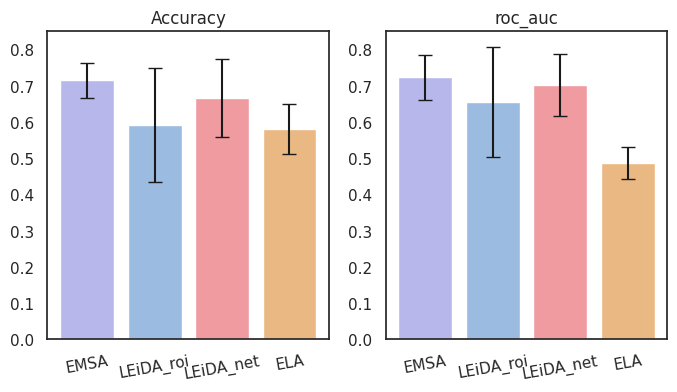

/tmp/ipykernel_40504/3886718508.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Model', y='Accuracy', data=df_acc, palette=colors)


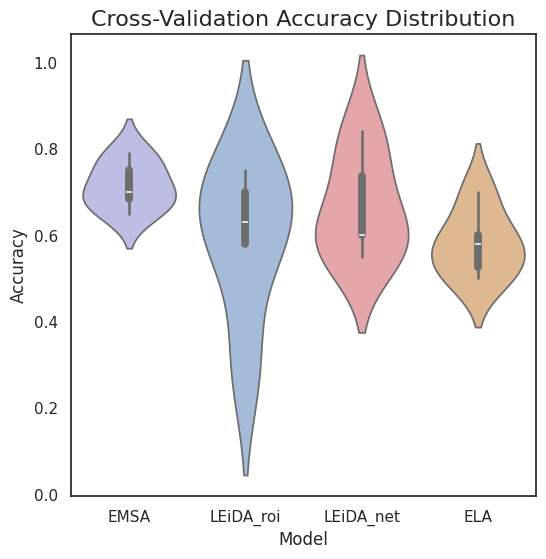

/tmp/ipykernel_40504/3886718508.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Model', y='ROC', data=df_roc, palette=colors)


<Figure size 640x480 with 0 Axes>

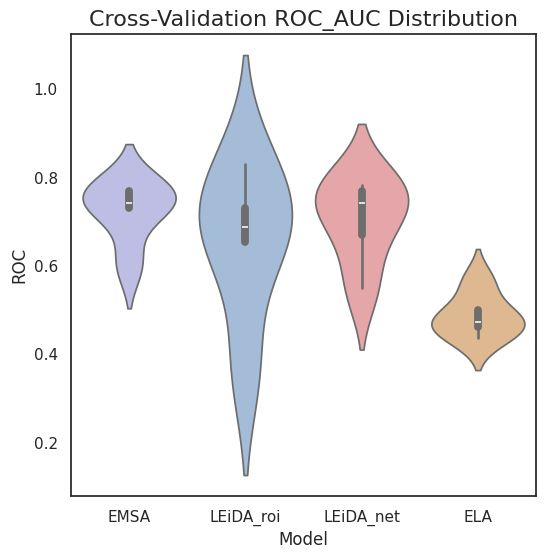

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(occ_data_cm, y, test_size=0.2, random_state=42)
X_train_leida_net, X_test_leida_net, y_train_leida_net, y_test_leida_net = train_test_split(occ_data_net, y, test_size=0.2, random_state=42)
X_train_leida_roi, X_test_leida_roi, y_train_leida_roi, y_test_leida_roi = train_test_split(occ_data_roi, y, test_size=0.2, random_state=42)
X_train_energy, X_test_energy, y_train_energy, y_test_energy = train_test_split(occ_data_el, y, test_size=0.2, random_state=42)
# Initialize the logistic regression classifier
model_combined = RandomForestClassifier(n_estimators=100, random_state=42)
model_leida_net = RandomForestClassifier(n_estimators=100, random_state=42)
model_leida_roi = RandomForestClassifier(n_estimators=100, random_state=42)
model_energy = RandomForestClassifier(n_estimators=100, random_state=42)

acc_combined = cross_val_score(model_combined, occ_data_cm, y, cv=5,scoring='accuracy')
acc_leida_net = cross_val_score(model_leida_net, occ_data_net, y, cv=5,scoring='accuracy')
acc_leida_roi = cross_val_score(model_leida_roi,occ_data_roi, y,cv=5,scoring='accuracy')
acc_energy = cross_val_score(model_energy, occ_data_el, y, cv=5,scoring='accuracy')

roc_combined = cross_val_score(model_combined, occ_data_cm, y, cv=5,scoring='roc_auc')
roc_leida_net = cross_val_score(model_leida_net, occ_data_net, y, cv=5,scoring='roc_auc')
roc_leida_roi = cross_val_score(model_leida_roi,occ_data_roi, y,cv=5,scoring='roc_auc')
roc_energy = cross_val_score(model_energy, occ_data_el, y, cv=5,scoring='roc_auc')

accuracies = [np.mean(scores) for scores in [acc_combined, acc_leida_roi, acc_leida_net, acc_energy]]
std_accuracies = [np.std(scores) for scores in [acc_combined, acc_leida_roi, acc_leida_net, acc_energy]]
roc = [np.mean(scores) for scores in [roc_combined, roc_leida_roi, roc_leida_net, roc_energy]]
std_roc = [np.std(scores) for scores in [roc_combined, roc_leida_roi, roc_leida_net, roc_energy]]

methods = ['EMSA', 'LEiDA_roi', 'LEiDA_net', 'ELA']
plt.figure(figsize=(8, 4))  
plt.subplot(1, 2, 1)  

# Draw the bar chart and the error bar
plt.bar(methods, accuracies, color=['#B7B7EB', '#9BBBE1', '#F09BA0', '#EAB883'], yerr=std_accuracies, capsize=5)
plt.title('Accuracy')
plt.xticks(rotation=10)
plt.ylim([0,0.85])
plt.subplot(1, 2, 2)  


plt.bar(methods, roc, color=['#B7B7EB', '#9BBBE1', '#F09BA0', '#EAB883'], yerr=std_roc, capsize=5)
plt.title('roc_auc')
plt.xticks(rotation=10)
plt.ylim([0,0.85])
plt.show()

data_acc = {
    'Model': ['EMSA'] * len(acc_combined) + ['LEiDA_roi'] * len(acc_leida_roi) +
             ['LEiDA_net'] * len(acc_leida_net) + ['ELA'] * len(acc_energy),
    'Accuracy': list(acc_combined) + list(acc_leida_roi) + list(acc_leida_net) + list(acc_energy)
}

df_acc = pd.DataFrame(data_acc)

data_roc = {
    'Model': ['EMSA'] * len(roc_combined) + ['LEiDA_roi'] * len(roc_leida_roi) +
             ['LEiDA_net'] * len(roc_leida_net) + ['ELA'] * len(roc_energy),
    'ROC': list(roc_combined) + list(roc_leida_roi) + list(roc_leida_net) + list(roc_energy)
}

df_roc = pd.DataFrame(data_roc)

sns.set(style="white")
colors=['#B7B7EB', '#9BBBE1', '#F09BA0', '#EAB883']
plt.figure(figsize=(6, 6))
sns.violinplot(x='Model', y='Accuracy', data=df_acc, palette=colors)

plt.title('Cross-Validation Accuracy Distribution', fontsize=16)
# plt.xlabel('Model', fontsize=14)
# plt.ylabel('Accuracy', fontsize=14)

plt.show()
plt.savefig('/data/dzy/combined_method/figure/sleep_accuracy.png',dpi=500)

plt.figure(figsize=(6, 6))
sns.violinplot(x='Model', y='ROC', data=df_roc, palette=colors)

plt.title('Cross-Validation ROC_AUC Distribution', fontsize=16)
# plt.xlabel('Model', fontsize=14)
# plt.ylabel('Accuracy', fontsize=14)

plt.show()
plt.savefig('/data/dzy/combined_method/figure/sleep_roc_auc.png',dpi=500)

# model_combined.fit(X_train_combined, y_train_combined)
# model_leida_net.fit(X_train_leida_net, y_train_leida_net)
# model_leida_roi.fit(X_train_leida_roi, y_train_leida_roi)
# model_energy.fit(X_train_energy, y_train_energy)

# y_pred_combined = model_combined.predict(X_test_combined)
# y_pred_proba_combined = model_combined.predict_proba(X_test_combined)[:, 1]  # 获取正类的概率

# y_pred_leida_net = model_leida_net.predict(X_test_leida_net)
# y_pred_proba_leida_net = model_leida_net.predict_proba(X_test_leida_net)[:, 1] 

# y_pred_leida_roi = model_leida_roi.predict(X_test_leida_roi)
# y_pred_proba_leida_roi = model_leida_roi.predict_proba(X_test_leida_roi)[:, 1] 

# y_pred_energy = model_energy.predict(X_test_energy)
# y_pred_proba_energy = model_energy.predict_proba(X_test_energy)[:, 1] 

# accuracy_combined = accuracy_score(y_test_combined, y_pred_combined)
# accuracy_leida_net = accuracy_score(y_test_leida_net, y_pred_leida_net)
# accuracy_leida_roi = accuracy_score(y_test_leida_roi, y_pred_leida_roi)
# accuracy_energy = accuracy_score(y_test_energy, y_pred_energy)
# print(f" Combined Method Accuracy: {accuracy_combined:.4f}")
# print(f"LEiDA_net Method Accuracy: {accuracy_leida_net:.4f}")
# print(f"LEiDA_roi Method Accuracy: {accuracy_leida_roi:.4f}")
# print(f"Energy Landscape Method Accuracy: {accuracy_energy:.4f}")

# fpr_combined, tpr_combined, thresholds_combined = roc_curve(y_test_combined, y_pred_proba_combined)
# roc_auc_combined = auc(fpr_combined, tpr_combined)

# fpr_leida_net, tpr_leida_net, thresholds_leida_net = roc_curve(y_test_leida_net, y_pred_proba_leida_net)
# roc_auc_leida_net = auc(fpr_leida_net, tpr_leida_net)
    
# fpr_leida_roi, tpr_leida_roi, thresholds_leida_roi = roc_curve(y_test_leida_roi, y_pred_proba_leida_roi)
# roc_auc_leida_roi = auc(fpr_leida_roi, tpr_leida_roi)

# fpr_energy, tpr_energy, thresholds_energy = roc_curve(y_test_energy, y_pred_proba_energy)
# roc_auc_energy = auc(fpr_energy, tpr_energy)
    
# print(f"Combined Method Area Under Curve (AUC): {roc_auc_combined:.4f}")
# print(f"LEiDA_net Method Area Under Curve (AUC): {roc_auc_leida_net:.4f}")
# print(f"LEiDA_roi Method Area Under Curve (AUC): {roc_auc_leida_roi:.4f}")
# print(f"Energy Landscape Method Area Under Curve (AUC): {roc_auc_energy:.4f}")

# plt.figure(figsize=(8, 6))
# plt.plot(fpr_combined, tpr_combined, color='#B7B7EB', label=f'Ours (ROC_AUC = {roc_auc_combined:.2f})')
# plt.plot(fpr_leida_net, tpr_leida_net, color='#F09BA0', label=f'LEiDA_net (ROC_AUC = {roc_auc_leida_net:.2f})')
# plt.plot(fpr_leida_roi, tpr_leida_roi, color='#9BBBE1', label=f'LEiDA_roi (ROC_AUC = {roc_auc_leida_roi:.2f})')
# plt.plot(fpr_energy, tpr_energy, color='#EAB883', label=f'Energy Landscape (ROC_AUC = {roc_auc_energy:.2f})')
# plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # 对角线
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.legend(loc="lower right")
# plt.show()